In [57]:
#CTa-HW04-PyCitySchools

In [58]:
#import libraries to use
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [59]:
#read in files
school_data = pd.read_csv('Resources/schools_complete.csv')

student_data = pd.read_csv('Resources/students_complete.csv')

In [60]:
#shows first 5 lines in school data
school_data.head()

,School ID,name,type,size,budget
0,0,Huang High School,District,2917,1910635
1,1,Figueroa High School,District,2949,1884411
2,2,Shelton High School,Charter,1761,1056600
3,3,Hernandez High School,District,4635,3022020
4,4,Griffin High School,Charter,1468,917500


In [61]:
#shows first 5 lines in student data
student_data.head()

,Student ID,name,gender,grade,school,reading_score,math_score
0,0,Paul Bradley,M,9th,Huang High School,66,79
1,1,Victor Smith,M,12th,Huang High School,94,61
2,2,Kevin Rodriguez,M,12th,Huang High School,90,60
3,3,Dr. Richard Scott,M,12th,Huang High School,67,58
4,4,Bonnie Ray,F,9th,Huang High School,97,84


In [62]:
#District Summary Calculations
school_total = len(school_data)
student_total = len(student_data)
budget_total = school_data['budget'].sum()
avgmath_score = student_data['math_score'].mean()
avgread_score = student_data['reading_score'].mean()

pass_math_count = student_data[student_data.math_score >=70]
pass_math_total = len(pass_math_count)
pass_math_percent =(pass_math_total / student_total)*100

pass_read_count = student_data[student_data.reading_score >=70]
pass_read_total = len(pass_read_count)
pass_read_percent =(pass_read_total / student_total)*100

overall_pass_rate= ((pass_read_percent + pass_math_percent)/2)

In [63]:
#Display District Summary Calculations
print("Total_Schools = ", school_total)
print("Total_Students = ", student_total)
print("Total_Budget = ", budget_total)
print("Avg_Math_Score = ", avgmath_score)
print("Avg_Read_Score = ", avgread_score)
print("%_Pass_Math = ", pass_math_percent)
print("%_Pass_Read = ", pass_read_percent)
print("Overall_Pass_Rate = ", overall_pass_rate)

Total_Schools =  15
Total_Students =  39170
Total_Budget =  24649428
Avg_Math_Score =  78.98537145774827
Avg_Read_Score =  81.87784018381414
%_Pass_Math =  74.9808526933878
%_Pass_Read =  85.80546336482001
Overall_Pass_Rate =  80.39315802910392


In [64]:
#Convert district summary data into a dataframe (table)
district_summary = pd.DataFrame({'Total_Schools': [school_total],'Total_Students': [student_total], 
                                 'Total_Budget': [budget_total], 'Avg_Math_Score': [avgmath_score],
                                 'Avg_Read_Score': [avgread_score], '%_Pass_Math': [pass_math_percent], 
                                 '%_Pass_Read': [pass_read_percent], 'Overall_Pass_Rate': [overall_pass_rate]
                                })

In [65]:
#Order district summary data into a specific order in the table and round data to 2 decimal places
district_summary = district_summary[['Total_Schools','Total_Students','Total_Budget', 'Avg_Math_Score', 
                                     'Avg_Read_Score', '%_Pass_Math', '%_Pass_Read', 'Overall_Pass_Rate']]

district_summary = district_summary.round(2)

district_summary = district_summary

In [66]:
#Display completed District Summary table
district_summary_df = pd.DataFrame(district_summary)
district_summary_df

,Total_Schools,Total_Students,Total_Budget,Avg_Math_Score,Avg_Read_Score,%_Pass_Math,%_Pass_Read,Overall_Pass_Rate
0,15,39170,24649428,78.99,81.88,74.98,85.81,80.39


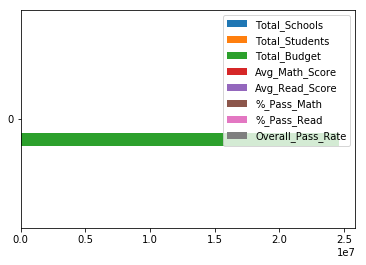

In [67]:
#Plot the District Summary data on a bar graph
%matplotlib inline
district_summary_df.plot(kind='barh')

In [68]:
#Take out only fields in school data needed for School Summary
subset_school = school_data[['name','type','budget']]
subset_school.reset_index(inplace=True)
subset_school

,index,name,type,budget
0,0,Huang High School,District,1910635
1,1,Figueroa High School,District,1884411
2,2,Shelton High School,Charter,1056600
3,3,Hernandez High School,District,3022020
4,4,Griffin High School,Charter,917500
5,5,Wilson High School,Charter,1319574
6,6,Cabrera High School,Charter,1081356
7,7,Bailey High School,District,3124928
8,8,Holden High School,Charter,248087
9,9,Pena High School,Charter,585858


In [69]:
#Rename columns in school data from name to school to merge data later
subset_school_summary = subset_school.rename(columns={'name':'school_name', 'type':'school_type', 'budget':'school_budget'})
subset_school_summary


,index,school_name,school_type,school_budget
0,0,Huang High School,District,1910635
1,1,Figueroa High School,District,1884411
2,2,Shelton High School,Charter,1056600
3,3,Hernandez High School,District,3022020
4,4,Griffin High School,Charter,917500
5,5,Wilson High School,Charter,1319574
6,6,Cabrera High School,Charter,1081356
7,7,Bailey High School,District,3124928
8,8,Holden High School,Charter,248087
9,9,Pena High School,Charter,585858


In [70]:
#School Summary Calculations
sch_stu_total = student_data['school'].value_counts()
sch_per_budget = school_data.groupby('name').budget.sum()
sch_stu_avgmath = student_data.groupby('school').math_score.mean()
sch_stu_avgread = student_data.groupby('school').reading_score.mean()

sch_pass_math_count = student_data[student_data.math_score >=70]
sch_pass_math_total = sch_pass_math_count.groupby("school")['Student ID'].count()
sch_pass_math_percent =(sch_pass_math_total / sch_stu_total)*100

sch_pass_read_count = student_data[student_data.reading_score >=70]
sch_pass_read_total = sch_pass_read_count.groupby("school")['Student ID'].count()
sch_pass_read_percent =(sch_pass_read_total / sch_stu_total)*100

grp_overall_pass_rate= ((sch_pass_read_percent + sch_pass_math_percent)/2)

In [71]:
#Display School Summary Calculations
print("Total_Students_By_School = ", sch_stu_total)
print("")
print("Total_Budget_By_School = ", sch_per_budget)
print("")
print("")
print("Avg_Math_Score_By_School = ", sch_stu_avgmath)
print("")
print("")
print("Avg_Read_Score_By_School = ", sch_stu_avgread)
print("")
print("")
print("%_Pass_Math_By_School = ", sch_pass_math_percent)
print("")
print("")
print("%_Pass_Read_By_School = ", sch_pass_read_percent)
print("")
print("")
print("Overall_Pass_Rate_By_School = ", grp_overall_pass_rate)
print("")
print("")

Total_Students_By_School =  Bailey High School       4976
Johnson High School      4761
Hernandez High School    4635
Rodriguez High School    3999
Figueroa High School     2949
Huang High School        2917
Ford High School         2739
Wilson High School       2283
Cabrera High School      1858
Wright High School       1800
Shelton High School      1761
Thomas High School       1635
Griffin High School      1468
Pena High School          962
Holden High School        427
Name: school, dtype: int64

Total_Budget_By_School =  name
Bailey High School       3124928
Cabrera High School      1081356
Figueroa High School     1884411
Ford High School         1763916
Griffin High School       917500
Hernandez High School    3022020
Holden High School        248087
Huang High School        1910635
Johnson High School      3094650
Pena High School          585858
Rodriguez High School    2547363
Shelton High School      1056600
Thomas High School       1043130
Wilson High School       1319574
W

In [72]:
#Create table for school summary and reset index for later use
school_summary = pd.concat([sch_stu_total, sch_per_budget,sch_stu_avgmath,
                            sch_stu_avgread,sch_pass_math_percent,sch_pass_read_percent, grp_overall_pass_rate], axis=1)

school_summary.reset_index(inplace=True)
school_summary

,index,school,budget,math_score,reading_score,0,1,2
0,Bailey High School,4976,3124928,77.048432,81.033963,66.680064,81.933280,74.306672
1,Cabrera High School,1858,1081356,83.061895,83.975780,94.133477,97.039828,95.586652
2,Figueroa High School,2949,1884411,76.711767,81.158020,65.988471,80.739234,73.363852
3,Ford High School,2739,1763916,77.102592,80.746258,68.309602,79.299014,73.804308
4,Griffin High School,1468,917500,83.351499,83.816757,93.392371,97.138965,95.265668
5,Hernandez High School,4635,3022020,77.289752,80.934412,66.752967,80.862999,73.807983
6,Holden High School,427,248087,83.803279,83.814988,92.505855,96.252927,94.379391
7,Huang High School,2917,1910635,76.629414,81.182722,65.683922,81.316421,73.500171
8,Johnson High School,4761,3094650,77.072464,80.966394,66.057551,81.222432,73.639992
9,Pena High School,962,585858,83.839917,84.044699,94.594595,95.945946,95.270270


In [73]:
#Rename column names
school_summary_final = school_summary.rename(columns={'index':'school_name', 'school':'total_students', 
                                                      'budget': 'school_budget', 'math_score': 'avg_math_score', 
                                                      'reading_score': 'avg_read_score', 0: '%_Pass_Math', 1:'%_Pass_Read', 
                                                      2:'Overall_Pass_Rate'})

school_summary_final


,school_name,total_students,school_budget,avg_math_score,avg_read_score,%_Pass_Math,%_Pass_Read,Overall_Pass_Rate
0,Bailey High School,4976,3124928,77.048432,81.033963,66.680064,81.933280,74.306672
1,Cabrera High School,1858,1081356,83.061895,83.975780,94.133477,97.039828,95.586652
2,Figueroa High School,2949,1884411,76.711767,81.158020,65.988471,80.739234,73.363852
3,Ford High School,2739,1763916,77.102592,80.746258,68.309602,79.299014,73.804308
4,Griffin High School,1468,917500,83.351499,83.816757,93.392371,97.138965,95.265668
5,Hernandez High School,4635,3022020,77.289752,80.934412,66.752967,80.862999,73.807983
6,Holden High School,427,248087,83.803279,83.814988,92.505855,96.252927,94.379391
7,Huang High School,2917,1910635,76.629414,81.182722,65.683922,81.316421,73.500171
8,Johnson High School,4761,3094650,77.072464,80.966394,66.057551,81.222432,73.639992
9,Pena High School,962,585858,83.839917,84.044699,94.594595,95.945946,95.270270


In [74]:
#Combine subset school summary and school summary final into one table
merged_school_summary = pd.merge(subset_school_summary, school_summary_final, on="school_name")
merged_school_summary

,index,school_name,school_type,school_budget_x,total_students,school_budget_y,avg_math_score,avg_read_score,%_Pass_Math,%_Pass_Read,Overall_Pass_Rate
0,0,Huang High School,District,1910635,2917,1910635,76.629414,81.182722,65.683922,81.316421,73.500171
1,1,Figueroa High School,District,1884411,2949,1884411,76.711767,81.158020,65.988471,80.739234,73.363852
2,2,Shelton High School,Charter,1056600,1761,1056600,83.359455,83.725724,93.867121,95.854628,94.860875
3,3,Hernandez High School,District,3022020,4635,3022020,77.289752,80.934412,66.752967,80.862999,73.807983
4,4,Griffin High School,Charter,917500,1468,917500,83.351499,83.816757,93.392371,97.138965,95.265668
5,5,Wilson High School,Charter,1319574,2283,1319574,83.274201,83.989488,93.867718,96.539641,95.203679
6,6,Cabrera High School,Charter,1081356,1858,1081356,83.061895,83.975780,94.133477,97.039828,95.586652
7,7,Bailey High School,District,3124928,4976,3124928,77.048432,81.033963,66.680064,81.933280,74.306672
8,8,Holden High School,Charter,248087,427,248087,83.803279,83.814988,92.505855,96.252927,94.379391
9,9,Pena High School,Charter,585858,962,585858,83.839917,84.044699,94.594595,95.945946,95.270270


In [75]:
#Add total budget and rename columns
merged_school_summary['school_budget_x'] = budget_total

merged_school_summary = merged_school_summary.rename(columns={'school_name':'School_Name', 'school_type':'School_Type', 
                                                      'total_students': 'Total_Students', 'school_budget_x': 'Total_Budget', 
                                                      'school_budget_y':'School_Budget', 'math_score': 'Avg_Math_Score', 
                                                      'reading_score': 'Avg_Read_Score', '%_Pass_Math': '%_Pass_Math', 
                                                        '%_Pass_Read':'%_Pass_Read', 'Overall_Pass_Rate':'Overall_Pass_Rate'})

merged_school_summary

,index,School_Name,School_Type,Total_Budget,Total_Students,School_Budget,avg_math_score,avg_read_score,%_Pass_Math,%_Pass_Read,Overall_Pass_Rate
0,0,Huang High School,District,24649428,2917,1910635,76.629414,81.182722,65.683922,81.316421,73.500171
1,1,Figueroa High School,District,24649428,2949,1884411,76.711767,81.158020,65.988471,80.739234,73.363852
2,2,Shelton High School,Charter,24649428,1761,1056600,83.359455,83.725724,93.867121,95.854628,94.860875
3,3,Hernandez High School,District,24649428,4635,3022020,77.289752,80.934412,66.752967,80.862999,73.807983
4,4,Griffin High School,Charter,24649428,1468,917500,83.351499,83.816757,93.392371,97.138965,95.265668
5,5,Wilson High School,Charter,24649428,2283,1319574,83.274201,83.989488,93.867718,96.539641,95.203679
6,6,Cabrera High School,Charter,24649428,1858,1081356,83.061895,83.975780,94.133477,97.039828,95.586652
7,7,Bailey High School,District,24649428,4976,3124928,77.048432,81.033963,66.680064,81.933280,74.306672
8,8,Holden High School,Charter,24649428,427,248087,83.803279,83.814988,92.505855,96.252927,94.379391
9,9,Pena High School,Charter,24649428,962,585858,83.839917,84.044699,94.594595,95.945946,95.270270


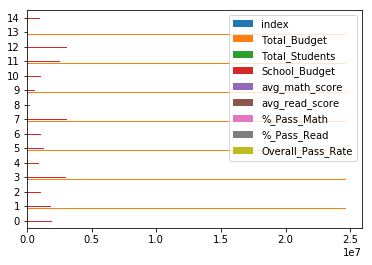

In [76]:
#Plot the School Summary data on a bar graph
%matplotlib inline
merged_school_summary.plot(kind='barh')

In [77]:
#Top Performing Schools By Passing Rate
merged_school_summary.nlargest(5, 'Overall_Pass_Rate')

,index,School_Name,School_Type,Total_Budget,Total_Students,School_Budget,avg_math_score,avg_read_score,%_Pass_Math,%_Pass_Read,Overall_Pass_Rate
6,6,Cabrera High School,Charter,24649428,1858,1081356,83.061895,83.975780,94.133477,97.039828,95.586652
14,14,Thomas High School,Charter,24649428,1635,1043130,83.418349,83.848930,93.272171,97.308869,95.290520
9,9,Pena High School,Charter,24649428,962,585858,83.839917,84.044699,94.594595,95.945946,95.270270
4,4,Griffin High School,Charter,24649428,1468,917500,83.351499,83.816757,93.392371,97.138965,95.265668
5,5,Wilson High School,Charter,24649428,2283,1319574,83.274201,83.989488,93.867718,96.539641,95.203679


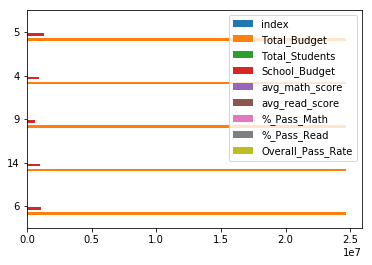

In [78]:
#Plot Top Performing Schools By Passing Rate
%matplotlib inline
merged_school_summary.nlargest(5, 'Overall_Pass_Rate').plot(kind='barh')

In [79]:
#Bottom Performing Schools By Passing Rate
merged_school_summary.nsmallest(5, 'Overall_Pass_Rate')

,index,School_Name,School_Type,Total_Budget,Total_Students,School_Budget,avg_math_score,avg_read_score,%_Pass_Math,%_Pass_Read,Overall_Pass_Rate
11,11,Rodriguez High School,District,24649428,3999,2547363,76.842711,80.744686,66.366592,80.220055,73.293323
1,1,Figueroa High School,District,24649428,2949,1884411,76.711767,81.158020,65.988471,80.739234,73.363852
0,0,Huang High School,District,24649428,2917,1910635,76.629414,81.182722,65.683922,81.316421,73.500171
12,12,Johnson High School,District,24649428,4761,3094650,77.072464,80.966394,66.057551,81.222432,73.639992
13,13,Ford High School,District,24649428,2739,1763916,77.102592,80.746258,68.309602,79.299014,73.804308


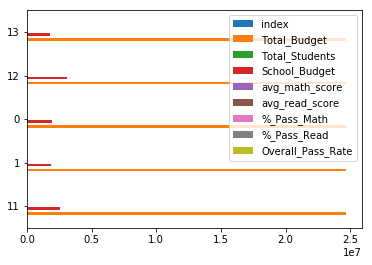

In [80]:
#Plot Bottom Performing Schools By Passing Rate
%matplotlib inline
merged_school_summary.nsmallest(5, 'Overall_Pass_Rate').plot(kind='barh')

In [81]:
#Math Scores by Grade
stu_grd_avgmath = student_data.groupby(['school', 'grade'])['math_score'].mean()
stu_grd_avgmath=pd.DataFrame(stu_grd_avgmath)
stu_grd_avgmath

math_score
school                grade            
Bailey High School    10th    76.996772
                      11th    77.515588
                      12th    76.492218
                      9th     77.083676
Cabrera High School   10th    83.154506
                      11th    82.765560
                      12th    83.277487
                      9th     83.094697
Figueroa High School  10th    76.539974
                      11th    76.884344
                      12th    77.151369
                      9th     76.403037
Ford High School      10th    77.672316
                      11th    76.918058
                      12th    76.179963
                      9th     77.361345
Griffin High School   10th    84.229064
                      11th    83.842105
                      12th    83.356164
                      9th     82.044010
Hernandez High School 10th    77.337408
                      11th    77.136029
                      12th    77.186567
                      9th     77.438495
Holden High School    10th    83.429825
                      11th    85.000000
                      12th    82.855422
                      9th     83.787402
Huang High School     10th    75.908735
                      11th    76.446602
                      12th    77.225641
                      9th     77.027251
Johnson High School   10th    76.691117
                      11th    77.491653
                      12th    76.863248
                      9th     77.187857
Pena High School      10th    83.372000
                      11th    84.328125
                      12th    84.121547
                      9th     83.625455
Rodriguez High School 10th    76.612500
                      11th    76.395626
                      12th    77.690748
                      9th     76.859966
Shelton High School   10th    82.917411
                      11th    83.383495
                      12th    83.778976
                      9th     83.420755
Thomas High School    10th    83.087886
                      11th    83.498795
                      12th    83.497041
                      9th     83.590022
Wilson High School    10th    83.724422
                      11th    83.195326
                      12th    83.035794
                      9th     83.085578
Wright High School    10th    84.010288
                      11th    83.836782
                      12th    83.644986
                      9th     83.264706

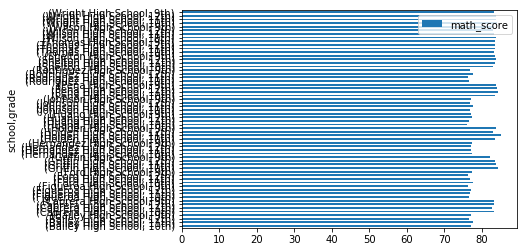

In [82]:
#Plot Math Scores by Grade
%matplotlib inline
stu_grd_avgmath.plot(kind='barh')

In [83]:
#Reading Scores by Grade
stu_grd_avgread = student_data.groupby(['school', 'grade'])['reading_score'].mean()
stu_grd_avgread = pd.DataFrame(stu_grd_avgread)
stu_grd_avgread

reading_score
school                grade               
Bailey High School    10th       80.907183
                      11th       80.945643
                      12th       80.912451
                      9th        81.303155
Cabrera High School   10th       84.253219
                      11th       83.788382
                      12th       84.287958
                      9th        83.676136
Figueroa High School  10th       81.408912
                      11th       80.640339
                      12th       81.384863
                      9th        81.198598
Ford High School      10th       81.262712
                      11th       80.403642
                      12th       80.662338
                      9th        80.632653
Griffin High School   10th       83.706897
                      11th       84.288089
                      12th       84.013699
                      9th        83.369193
Hernandez High School 10th       80.660147
                      11th       81.396140
                      12th       80.857143
                      9th        80.866860
Holden High School    10th       83.324561
                      11th       83.815534
                      12th       84.698795
                      9th        83.677165
Huang High School     10th       81.512386
                      11th       81.417476
                      12th       80.305983
                      9th        81.290284
Johnson High School   10th       80.773431
                      11th       80.616027
                      12th       81.227564
                      9th        81.260714
Pena High School      10th       83.612000
                      11th       84.335938
                      12th       84.591160
                      9th        83.807273
Rodriguez High School 10th       80.629808
                      11th       80.864811
                      12th       80.376426
                      9th        80.993127
Shelton High School   10th       83.441964
                      11th       84.373786
                      12th       82.781671
                      9th        84.122642
Thomas High School    10th       84.254157
                      11th       83.585542
                      12th       83.831361
                      9th        83.728850
Wilson High School    10th       84.021452
                      11th       83.764608
                      12th       84.317673
                      9th        83.939778
Wright High School    10th       83.812757
                      11th       84.156322
                      12th       84.073171
                      9th        83.833333

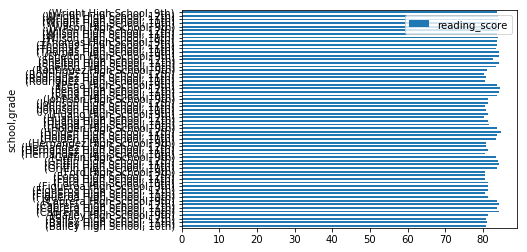

In [84]:
#Plot Reading Scores by Grade
%matplotlib inline
stu_grd_avgread.plot(kind='barh')

In [85]:
#Scores By School Spending
merged_school_summary

,index,School_Name,School_Type,Total_Budget,Total_Students,School_Budget,avg_math_score,avg_read_score,%_Pass_Math,%_Pass_Read,Overall_Pass_Rate
0,0,Huang High School,District,24649428,2917,1910635,76.629414,81.182722,65.683922,81.316421,73.500171
1,1,Figueroa High School,District,24649428,2949,1884411,76.711767,81.158020,65.988471,80.739234,73.363852
2,2,Shelton High School,Charter,24649428,1761,1056600,83.359455,83.725724,93.867121,95.854628,94.860875
3,3,Hernandez High School,District,24649428,4635,3022020,77.289752,80.934412,66.752967,80.862999,73.807983
4,4,Griffin High School,Charter,24649428,1468,917500,83.351499,83.816757,93.392371,97.138965,95.265668
5,5,Wilson High School,Charter,24649428,2283,1319574,83.274201,83.989488,93.867718,96.539641,95.203679
6,6,Cabrera High School,Charter,24649428,1858,1081356,83.061895,83.975780,94.133477,97.039828,95.586652
7,7,Bailey High School,District,24649428,4976,3124928,77.048432,81.033963,66.680064,81.933280,74.306672
8,8,Holden High School,Charter,24649428,427,248087,83.803279,83.814988,92.505855,96.252927,94.379391
9,9,Pena High School,Charter,24649428,962,585858,83.839917,84.044699,94.594595,95.945946,95.270270


In [86]:
#Calculate Average Spending Ranges (per Student)
avgspend = (sch_per_budget/sch_stu_total)
avgspendbin = (sch_per_budget/sch_stu_total)

In [87]:
#Create table, reset index, and rename columns
avg_spend_summary = pd.concat([avgspend, avgspendbin], axis=1)

avg_spend_summary.reset_index(inplace=True)

avg_spend_summary=avg_spend_summary.rename(columns={'index':'school_name', 0:'avg_spend', 1:'avg_spend_bin'})
avg_spend_summary

,school_name,avg_spend,avg_spend_bin
0,Bailey High School,628.0,628.0
1,Cabrera High School,582.0,582.0
2,Figueroa High School,639.0,639.0
3,Ford High School,644.0,644.0
4,Griffin High School,625.0,625.0
5,Hernandez High School,652.0,652.0
6,Holden High School,581.0,581.0
7,Huang High School,655.0,655.0
8,Johnson High School,650.0,650.0
9,Pena High School,609.0,609.0


In [88]:
#Create Bins to bucket average spending
bins = [500, 550, 600, 650, 700]
avg_spend_summary['avg_spend_bin'] = pd.cut(avg_spend_summary['avg_spend'], bins)
avg_spend_summary

,school_name,avg_spend,avg_spend_bin
0,Bailey High School,628.0,"(600, 650]"
1,Cabrera High School,582.0,"(550, 600]"
2,Figueroa High School,639.0,"(600, 650]"
3,Ford High School,644.0,"(600, 650]"
4,Griffin High School,625.0,"(600, 650]"
5,Hernandez High School,652.0,"(650, 700]"
6,Holden High School,581.0,"(550, 600]"
7,Huang High School,655.0,"(650, 700]"
8,Johnson High School,650.0,"(600, 650]"
9,Pena High School,609.0,"(600, 650]"


In [89]:
#Merge and average spending data together with summary data
merged_school_spending = pd.merge(subset_school_summary, avg_spend_summary, on="school_name")
merged_school_spending

,index,school_name,school_type,school_budget,avg_spend,avg_spend_bin
0,0,Huang High School,District,1910635,655.0,"(650, 700]"
1,1,Figueroa High School,District,1884411,639.0,"(600, 650]"
2,2,Shelton High School,Charter,1056600,600.0,"(550, 600]"
3,3,Hernandez High School,District,3022020,652.0,"(650, 700]"
4,4,Griffin High School,Charter,917500,625.0,"(600, 650]"
5,5,Wilson High School,Charter,1319574,578.0,"(550, 600]"
6,6,Cabrera High School,Charter,1081356,582.0,"(550, 600]"
7,7,Bailey High School,District,3124928,628.0,"(600, 650]"
8,8,Holden High School,Charter,248087,581.0,"(550, 600]"
9,9,Pena High School,Charter,585858,609.0,"(600, 650]"


In [90]:
#Display Scores by School Spending in Bins
grp_merged_school_spending = merged_school_spending.groupby('avg_spend_bin').mean()
grp_merged_school_spending

,index,school_budget,avg_spend
avg_spend_bin,,,
"(500, 550]",NaN,NaN,NaN
"(550, 600]",6.200,951003.4,584.80
"(600, 650]",8.875,1870219.5,633.75
"(650, 700]",1.500,2466327.5,653.50


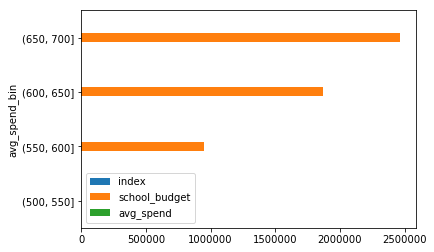

In [91]:
#Plot Scores by School Spending in Bins
%matplotlib inline
grp_merged_school_spending.plot(kind='barh')

In [92]:
#Take out only fields in school data needed for School Summary
subset_school_2 = school_data[['name','type','size']]
subset_school_2.reset_index(inplace=True)
subset_school_2 = subset_school_2.rename(columns={'name':'school_name', 'type':'type', 'size':'size'})
subset_school_2

,index,school_name,type,size
0,0,Huang High School,District,2917
1,1,Figueroa High School,District,2949
2,2,Shelton High School,Charter,1761
3,3,Hernandez High School,District,4635
4,4,Griffin High School,Charter,1468
5,5,Wilson High School,Charter,2283
6,6,Cabrera High School,Charter,1858
7,7,Bailey High School,District,4976
8,8,Holden High School,Charter,427
9,9,Pena High School,Charter,962


In [93]:
#Combine subset school 2 and merged school spending to create one table for school size
merged_school_size = pd.merge(subset_school_2, merged_school_spending, on="school_name")
merged_school_size

,index_x,school_name,type,size,index_y,school_type,school_budget,avg_spend,avg_spend_bin
0,0,Huang High School,District,2917,0,District,1910635,655.0,"(650, 700]"
1,1,Figueroa High School,District,2949,1,District,1884411,639.0,"(600, 650]"
2,2,Shelton High School,Charter,1761,2,Charter,1056600,600.0,"(550, 600]"
3,3,Hernandez High School,District,4635,3,District,3022020,652.0,"(650, 700]"
4,4,Griffin High School,Charter,1468,4,Charter,917500,625.0,"(600, 650]"
5,5,Wilson High School,Charter,2283,5,Charter,1319574,578.0,"(550, 600]"
6,6,Cabrera High School,Charter,1858,6,Charter,1081356,582.0,"(550, 600]"
7,7,Bailey High School,District,4976,7,District,3124928,628.0,"(600, 650]"
8,8,Holden High School,Charter,427,8,Charter,248087,581.0,"(550, 600]"
9,9,Pena High School,Charter,962,9,Charter,585858,609.0,"(600, 650]"


In [94]:
#Create bins for school size
bins = [100, 1500, 2500, 5000]
group_names = ['Small', 'Medium', 'Large']
merged_school_size['avg_spend_bin'] = pd.cut(merged_school_size['size'], bins, labels=group_names)

merged_school_size = merged_school_size.rename(columns={'avg_spend_bin':'School_Size'})


In [95]:
#Display Scores by School Size in Bins
grp_merged_school_size = merged_school_size.groupby('School_Size').mean()
grp_merged_school_size

,index_x,size,index_y,school_budget,avg_spend
School_Size,,,,,
Large,6.714286,3853.714286,6.714286,2.478275e+06,643.571429
Medium,7.400000,1867.400000,7.400000,1.110012e+06,596.200000
Small,7.000000,952.333333,7.000000,5.838150e+05,605.000000


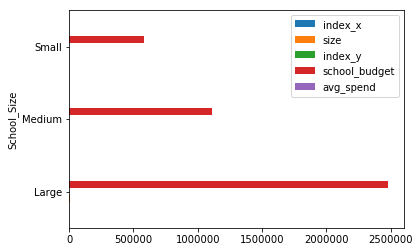

In [96]:
#Plot Scores by School Size in Bins
%matplotlib inline
grp_merged_school_size.plot(kind='barh')

In [97]:
#Group by School Type and display it
merged_school_type = merged_school_size.groupby('type').mean()
merged_school_type

,index_x,size,index_y,school_budget,avg_spend
type,,,,,
Charter,7.250000,1524.250000,7.250000,9.126881e+05,599.500000
District,6.714286,3853.714286,6.714286,2.478275e+06,643.571429


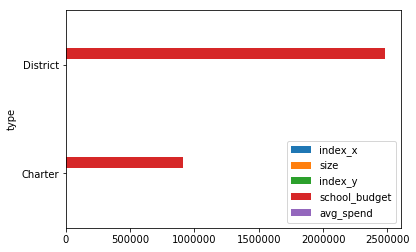

In [98]:
#Plot by School Type and display it
%matplotlib inline
merged_school_type.plot(kind='barh')